"Two orders of the 2D FRAP". In this problem we will consider two ways to simulate FRAP in two dimensions. We will consider a "square cell" with sides of length 2L = 2 µm that initially has uniform fluorescence (i.e. from -L to L in both X and Y). We then photobleach (i.e. destroy the fluorescence) a smaller square region in the middle of the square cell, between −B and B in both X and Y, with B = 0.1 µm. Consider the concentration in the unbleached region to be c0 = 1 µM, and let the diffusing molecules have a diffusion coefficient of 10 µm2/s. For each section below, we will use a different approach to working out the dynamics of the recovery process. If the lattice spacing a = 10 nm, this means the square cell would be 200 x 200 lattice points. Note you can reconcile simulation time step, the lattice parameter and the diffusion coefficient through the relation D = a2/τ, where τ is the time step.

(a) The first approach to simulating FRAP uses a random walker approach. Place walkers
throughout the square cell except the photobleached region. Use reflecting boundary
conditions, so that random walkers cannot exit the square cell. Note that after one timestep, almost all the walkers would still be in the unbleached regions. Your goal is to obtain the full average profile of the independently diffusing molecules. To achieve this: generate 100s-1000s of simulations. Visualize how average maps approach equilibrium (i.e., when walkers are spread uniformly over the square cell). Also visualize how the average value over the bleached region approaches equilibrium. 

In [58]:
import time
import numpy as np
import copy
import math

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_theme(style="darkgrid")

In [43]:
n_sims = 2000
n_walkers = 200
n_steps = 500 

positions = np.random.randint(-100,100, (n_sims, n_walkers, 2))  # 2 dimensional walk

# Bleach between -10,10
r_bleach = (-10,10)
bleached = ((positions[:,:,0] > r_bleach[0]) \
& (positions[:,:,0] < r_bleach[1]) \
& (positions[:,:,1] > r_bleach[0]) \
& (positions[:,:,1] < r_bleach[1])).reshape(n_sims, n_walkers, 1)

# randomly choose direction of each step by choosing a random integer from [0,2*ndim]
flips = np.random.choice([-2, -1, 1, 2], size = (n_sims, n_walkers, n_steps)).reshape(n_sims, n_walkers, n_steps, 1)
# 1: +1 x
# -1: -1 x
# 2: +1 y
# -2: -1 y

step_x = copy.copy(flips[:,:,:,0])
step_y = copy.copy(flips[:,:,:,0])
x_bool = (step_x == 2) | (step_x == -2)
y_bool = (step_y == 1) | (step_y == -1)

step_x[x_bool] = 0
step_y[y_bool] = 0
step_y = step_y / 2

all_positions = []
all_positions.append(copy.copy(positions))
positions_prev = positions

for i in range(n_steps):
    
    current_step_x = step_x[:,:,i]
    current_step_y = step_y[:,:,i]
        
    # get array positions of steps that need to be flipped
    flip_steps_x = np.zeros_like(current_step_x, dtype=np.bool)
    flip_steps_y = np.zeros_like(current_step_y, dtype=np.bool)
    
    flip_steps_x += (positions_prev[:,:,0] == 100) * (current_step_x == 1) \
            + (positions_prev[:,:,0] == -100) * (current_step_x == -1)
    
    flip_steps_y += (positions_prev[:,:,0] == 100) * (current_step_y == 2)  \
            + (positions_prev[:,:,0] == -100) * (current_step_y == -2)
    
    # flip those steps (reflective boundary)
    current_step_x[flip_steps_x] *= -1
    current_step_y[flip_steps_y] *= -1
    
    positions[:,:,0] = positions_prev[:,:,0] + current_step_x
    positions[:,:,1] = positions_prev[:,:,1] + current_step_y

    positions_prev = positions
    all_positions.append(copy.copy(positions))  # note: You don't have to save every position if you don't intend to do anything with them
all_positions = np.stack(all_positions, axis=2)
print('positions shape:', all_positions.shape)

/var/folders/9h/v7bymggj60j394yr5bpjx4mh0000gn/T/ipykernel_48712/964288309.py:40: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  flip_steps_x = np.zeros_like(current_step_x, dtype=np.bool)
/var/folders/9h/v7bymggj60j394yr5bpjx4mh0000gn/T/ipykernel_48712/964288309.py:41: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  flip_steps_y = np.zeros_like(curre

positions shape: (2000, 200, 501, 2)


shape of counts: (200, 200)
shape of counts: (200, 200)
shape of counts: (200, 200)
shape of counts: (200, 200)
shape of counts: (200, 200)
shape of counts: (200, 200)


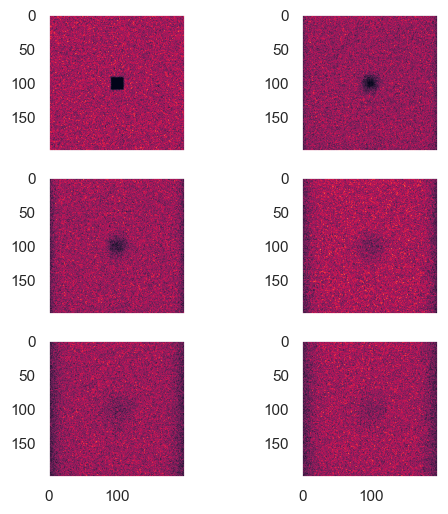

In [44]:
fig, axs = plt.subplots(3,2, figsize=(6,6), sharex=True)

ax = axs[0, 0]
i=1
counts = np.histogram2d(all_positions[~bleached[:,:,0],i,0].flatten(), all_positions[~bleached[:,:,0],i,1].flatten(), bins=np.arange(-100, 101, 1), range = [[-100, 100], [-100, 100]])[0]

ax.imshow(counts)
ax.grid(False)

ax = axs[0, 1]
i=50
counts = np.histogram2d(all_positions[~bleached[:,:,0],i,0].flatten(), all_positions[~bleached[:,:,0],i,1].flatten(), bins=np.arange(-100, 101, 1), range = [[-100, 100], [-100, 100]])[0]

ax.imshow(counts)
ax.grid(False)

ax = axs[1, 0]
i=100
counts = np.histogram2d(all_positions[~bleached[:,:,0],i,0].flatten(), all_positions[~bleached[:,:,0],i,1].flatten(), bins=np.arange(-100, 101, 1), range = [[-100, 100], [-100, 100]])[0]

ax.imshow(counts)
ax.grid(False)

ax = axs[1, 1]
i=300
counts = np.histogram2d(all_positions[~bleached[:,:,0],i,0].flatten(), all_positions[~bleached[:,:,0],i,1].flatten(), bins=np.arange(-100, 101, 1), range = [[-100, 100], [-100, 100]])[0]

ax.imshow(counts)
ax.grid(False)

ax = axs[2, 0]
i=400
counts = np.histogram2d(all_positions[~bleached[:,:,0],i,0].flatten(), all_positions[~bleached[:,:,0],i,1].flatten(), bins=np.arange(-100, 101, 1), range = [[-100, 100], [-100, 100]])[0]

ax.imshow(counts)
ax.grid(False)

ax = axs[2, 1]
i=500
counts = np.histogram2d(all_positions[~bleached[:,:,0],i,0].flatten(), all_positions[~bleached[:,:,0],i,1].flatten(), bins=np.arange(-100, 101, 1), range = [[-100, 100], [-100, 100]])[0]

ax.imshow(counts)
ax.grid(False)

In [ ]:
density_bleached = all_positions[bleached[:,:,0],i,0].flatten()

densities_bleached = counts[r_bleach[0]:r_bleach[1]].sum(axis=0) / n_bleach
densities_unbleached = (counts[:r_bleach[0],:].sum(axis=0) + counts[r_bleach[1]:,:].sum(axis=0)) / (len(counts) - n_bleach)

plt.plot(densities_bleached/n_sims, label='bleached region') # divide by n_sims to get density per simulation
plt.plot(densities_unbleached/n_sims, label='unbleached region')
plt.legend()

plt.xlabel('step')
_ = plt.ylabel('walkers per lattice location')

In [53]:
walkers_in_region = []
for i in range(n_steps):
    walkers_in_region.append(copy.copy((all_positions[~bleached[:,:,0],i,0] > r_bleach[0]) \
    & (all_positions[~bleached[:,:,0],i,0] < r_bleach[1]) \
    & (all_positions[~bleached[:,:,0],i,1] > r_bleach[0]) \
    & (all_positions[~bleached[:,:,0],i,1] < r_bleach[1])).sum())

[ -9  77  33 ... -36  18 -26]


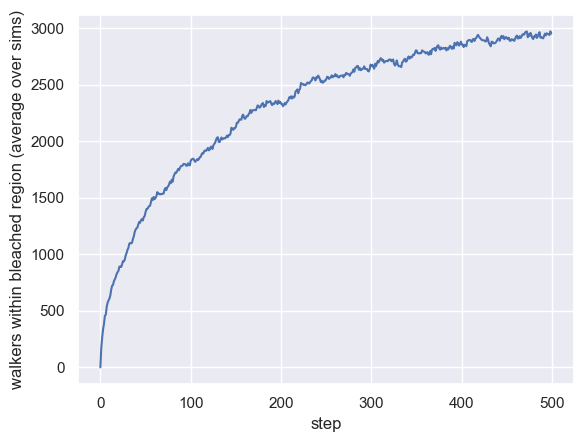

In [54]:
plt.plot(walkers_in_region)
plt.xlabel('step')
_ = plt.ylabel('walkers within bleached region (average over sims)')

(b) The second approach to simulating FRAP uses a chemical master equation. In class, we wrote down how a 1D probability distribution would evolve due to diffusion:
$p(x, y, t + \Delta t) = p(x,t) + (k \Delta t)p(x - a, t) + (k \Delta t)p(x+a,t)-(k \Delta t)p(x,t) - (k \Delta t)p(x,t)$
First, write down how a 2D probability distribution would evolve in the bulk, as well as at the boundaries (i.e. $p(x = \pm L, y, T)$ or $P(x,y = \pm L, t)$. To simulate FRAP, start with a square region that is initially bleached (i.e. $p(x,y,0) = 0$ in that region). Finally, generate average maps as a function of time. Visualize how average maps approach equilibrium (i.e., when walkers are spread uniformly over the square cell). Also visualize how the average value over the bleached region approaches equilibrium. How does this compare to the approach to equilibrium observed for the random walker approach?

2D probability distribution:
$P(x,y,t+\Delta t) = P(x,y,t) + (k \Delta t)P(x-a, y, t) + (k \Delta t)P(x+a, y, t) + (k \Delta t)P(x, y-a, t) + (k \Delta t)P(x, y+a, t) - 4(k \Delta t)P(x, y, t)$ 

where a = 10 nm, k = 10 um^2/second

Boundaries:
$P(\pm 100, \pm 100, t)$

FRAP bleaching:
$P([-10,10], [-10,10], 0) = 0$

In [198]:
n_sims = 2000
n_walkers = 200
n_steps = 500 

positions = np.ones((200,200))
bleached = np.arange(1,201)
bleached = (bleached > 90) * (bleached < 110)
positions[bleached] = 0

# unfortunately, I got a little stuck here and had to move on... if I have time over the weekend I'll see if I can get this implemented and plotted!

2. From class we derived the rate of absorption via diffusion by a sphere as $4\pi DRc_0$. Now we
want to apply this to the case of bacterial respiration. Assume oxygen enters the bacterium by diffusion. Assume 1 kg of bacteria burn oxygen at a rate of 0.006 mol/s, D = 2 μm2 /ms is the diffusion constant for oxygen in water, c0 = 0.2 mol/m3 is the oxygen concentration, and R is the radius of a typical bacterium, which we assume to be spherical. Remember to double check your units! 

(a) How does the amount of oxygen that diffuses into the bacterium compare to the amount used by a typical bacterium in metabolism? 

In [98]:
## define necessary values
R = 380 # nm (cite: https://bionumbers.hms.harvard.edu/bionumber.aspx?id=108602&ver=1&trm=radius+bacterium&org=)
D = 2 # um^2/ms
c0 = 0.2 # mol/m^3
mass_singular = 600e-18 # kg/bac (cite: https://bionumbers.hms.harvard.edu/bionumber.aspx?id=117320&ver=0&trm=mass+bacterium+e+coli&org=))
r = 0.006 # mols/s for 1 kg of bacteria

## calculate amount of oxygen used by 1 bacterium over 5 seconds
used = 0.006/bac_per_kg*delta_t

## calculate amount of oxygen diffused into 1 bacterium over 5 seconds
bac_per_kg = 1 / mass_singular
diff = 4*math.pi*D*R*c0/1e+6/1e+6/1e+9*1000*delta_t
print(f"{used} moles of oxygen used by 1 bacterium over 5 seconds. \n{diff} moles of oxygen diffused into 1 bacterium over 5 seconds.")

1.8e-17 moles of oxygen used by 1 bacterium over 5 seconds. 
9.550441666912973e-15 moles of oxygen diffused into 1 bacterium over 5 seconds.


(b) What conditions does this impose on the radius R for the bacterial cell? Assume that the
rate of bacterial metabolism scales with their volume. Compare it with the size of E. coli.
Answer succinctly, but show the calculations needed to explain your reasoning. 

In [168]:
# as R increases, volume increases and so does the rate of oxygen consumption
# for sake of calculations, assume rate of consumption increases as a function of 4/3 pi r^3 which can be approximated as r^3
diff = []
for i in range(300, 400, 1):
    diff.append(4*math.pi*D*i*c0/1e+6/1e+6/1e+9*1000*bac_per_kg)
print(diff)

[2.513274122871835, 2.5216517032814076, 2.5300292836909803, 2.538406864100553, 2.5467844445101258, 2.5551620249196993, 2.5635396053292716, 2.5719171857388443, 2.580294766148417, 2.5886723465579897, 2.597049926967563, 2.605427507377135, 2.613805087786708, 2.6221826681962805, 2.6305602486058537, 2.6389378290154264, 2.6473154094249995, 2.6556929898345722, 2.664070570244145, 2.672448150653718, 2.6808257310632904, 2.6892033114728626, 2.6975808918824358, 2.7059584722920085, 2.7143360527015816, 2.722713633111154, 2.7310912135207266, 2.7394687939303, 2.7478463743398724, 2.7562239547494456, 2.764601535159018, 2.772979115568591, 2.7813566959781646, 2.789734276387737, 2.7981118567973096, 2.806489437206882, 2.814867017616455, 2.8232445980260277, 2.8316221784356004, 2.839999758845173, 2.8483773392547462, 2.856754919664319, 2.8651325000738916, 2.8735100804834643, 2.881887660893037, 2.89026524130261, 2.8986428217121825, 2.907020402121756, 2.915397982531328, 2.923775562940901, 2.9321531433504733, 2.94

We know that as a cell's radius grows, its surface area (diffusion area) grows at a slower rate than its volume (O2 usage area). Hence, it makes sense that if a radius becomes too large, the surface area for diffusion will not be large enough to let in the requisite amount of O2 needed to compensate for the cell's volume growth.

3. In class we discussed how molecular motors operate with piconewton forces over nanometer scales. We briefly encountered Stokes' law when we derived the Einstein Relation between temperature and the diffusion coefficient. Stokes’ law relates the force (F) to velocity (V) in a fluid of viscosity η, as F=6πηRV, where R is the radius of the object moving through the fluid. 

(a) How large of an object can be moved through a viscous environment at a 2 μm/sec velocity with a 10 piconewton force? 

In [151]:
# R = F / (6πVη)

F = 1.0e-11 # force in N
V = 2e-6 # velocity m/sec

R = F / (6*math.pi * V) # divided by η
R

print(f"An object of size {R} / η meters can be moved through an environment of viscosity η at a 2 μm/sec velocity with a 10 piconewton force.")

An object of size 2.652582384864922e-07 / η meters can be moved through an environment of viscosity η at a 2 μm/sec velocity with a 10 piconewton force.


(b) What is the upper bound using the viscosity of water? What about in the more viscous cytoplasm? 

In [152]:
# cite: https://bionumbers.hms.harvard.edu/bionumber.aspx?id=103392&ver=4&trm=viscosity+of+water&org=
# cite: https://bionumbers.hms.harvard.edu/bionumber.aspx?id=108527&ver=1&trm=viscosity+of+cytoplasm&org=

η_water = 0.9779 * 0.001 # Ns/m^2
η_cytoplasm = 17.5 # Ns/m^2

R_water = F / (6*math.pi * V * η_water)
R_cytoplasm = F / (6*math.pi * V * η_cytoplasm)

print(f"An object of size {R_water * 1e+9:0.4} nm can be moved through water at 2 μm/sec velocity with a 10 piconewton force. \nAn object of size {R_cytoplasm* 1e+9:0.4} nm can be moved through cytoplasm at 2 μm/sec velocity with a 10 piconewton force.")

An object of size 2.713e+05 nm can be moved through water at 2 μm/sec velocity with a 10 piconewton force. 
An object of size 15.16 nm can be moved through cytoplasm at 2 μm/sec velocity with a 10 piconewton force.


(c) How does the maximum size relate to the size of organelles in the cell and the forces exerted by molecular motors?

The forces exerted by motors such as kinesin (7 pN) are along the scale of 1-10 pN, which is similar to the 10 pN force we are using in our above calculations. An example of a molecular motor's load is an organelle, say the Golgi tubule (radius 90 nm). According to our calculations, kinesin would be able to move the Golgi tubule in the cytoplasmic environment, though the velocity would be slightly less than the estimated 2 μm/sec)

(cite: https://bionumbers.hms.harvard.edu/bionumber.aspx?id=109127&ver=4&trm=molecular+motor+force&org=

https://bionumbers.hms.harvard.edu/bionumber.aspx?id=112517&ver=1&trm=size+of+organelle&org=)

(d) What could this estimate neglect that could increase or decrease the maximum size of a
transported cargo?

This estimate assumes a spherical cargo that would move through a viscous environment in a uniform manner. Additionally, this estimate assumes that the cytoplasmic environment is consistant (uncharged, unobstructed, and of uniform viscosity). 